In [6]:
#pip install SimpleITK

In [ ]:
#This code can be useful for a few things
#1) we can use this to determine the edge of the actual eye in the image (find the circle) 
# and then use this to search through just the circle in the next processing steps
#2) maybe define the optic disk if we do canny edge detection again on just the inner circle


In [1]:
import SimpleITK as sitk
import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder_path = "Glaucoma Dataset/train_0_first_50"
file_list = os.listdir(folder_path)

# Assuming there is only one image file in the folder, select the first one
image_file = file_list[0]

# Construct the full path to the image file
image_path = os.path.join(folder_path, image_file)
print(image_path)

# Read the image using SimpleITK
itkImage = sitk.ReadImage(image_path, sitk.sitkFloat32)

Glaucoma Dataset/train_0_first_50\TRAIN000000.JPG


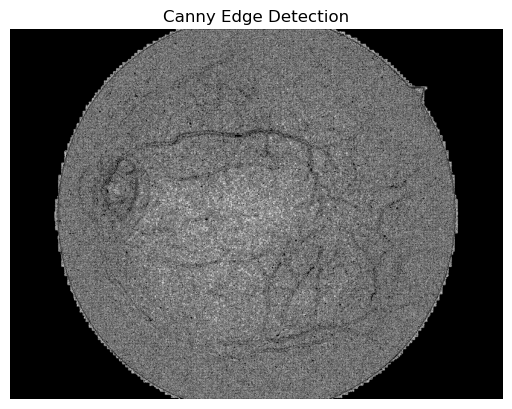

In [31]:
# Convert the image to grayscale if it's not already grayscale
if itkImage.GetNumberOfComponentsPerPixel() > 1:
    itkImage = sitk.VectorIndexSelectionCast(itkImage, channel=0, outputType=sitk.sitkFloat32)  # Assuming RGB, select the Red channel

# Perform Canny edge detection
img_ce = sitk.CannyEdgeDetection(itkImage, 0.0, 5.0, variance=(0, 0.0))

# Convert SimpleITK image to NumPy array for visualization
img_array = sitk.GetArrayFromImage(img_ce)

# Visualize the result
plt.imshow(img_array, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


In [34]:
# Convert the image to grayscale
itkImage = sitk.RGBToGray(itkImage)

# Apply the Canny Edge Detector
img_ce = sitk.CannyEdgeDetection(itkImage, 0.0, 0.0, (3, 0.0)) 

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(sitk.GetArrayFromImage(itkImage), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(sitk.GetArrayFromImage(img_ce), cmap='gray', vmin=0, vmax=0.2)  # Adjust the color map for better visualization
plt.title('Canny Edge Detection')
plt.show()

# Get information about the resulting image
img_arr = sitk.GetArrayFromImage(img_ce)
print(img_arr.shape, img_arr.max(), img_arr.min())


AttributeError: module 'SimpleITK' has no attribute 'RGBToGray'

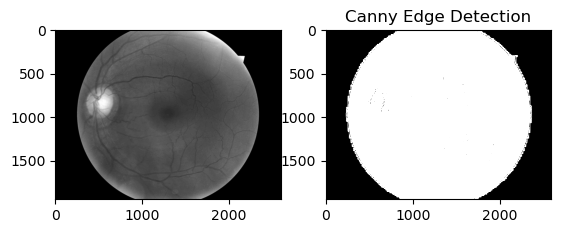

(1944, 2592) 1.0 0.0


In [31]:
# Apply the Canny Edge Detector
# https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1CannyEdgeDetectionImageFilter.html
# Paramter 1: the input image
# Parameter 2: the lower threshold (default set to 0.0)
# Parameter 3: the upper threshold (default set to 0.0)
# Parameter 4: the smoothing parameter as a vector (default set to (3, 0.0)    

img_ce = sitk.CannyEdgeDetection(itkImage, 0.0, 0.0, (3, 0.0)) 
#img_ce = sitk.CannyEdgeDetection(itkImage, 0.0, 5.0, (7.0, 7.0)) 

#img_ce = sitk.CannyEdgeDetection(itkImage, 5.0, 5.0)

plt.subplot(1, 2, 1)
plt.imshow(sitk.GetArrayFromImage(itkImage), cmap='gray')
plt.subplot(1, 2, 2)
#plt.imshow(sitk.GetArrayFromImage(img_ce), cmap='gray')
plt.imshow(sitk.GetArrayFromImage(img_ce), cmap='gray',vmin=0,vmax=0.2)#this makes the edges brighter
plt.title('Canny Edge Detection')
plt.show()

img_arr = sitk.GetArrayFromImage(img_ce)
print(img_arr.shape, img_arr.max(), img_arr.min())

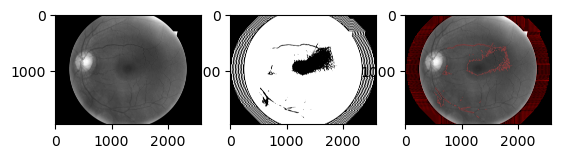

In [23]:
''' 
Exercise code block
'''

itkImage = sitk.Cast(itkImage, sitk.sitkFloat32)

# 1. Identify a good smoothing parameter and show the smoothed image
smoothed_image = sitk.SmoothingRecursiveGaussian(itkImage, 3.0)

# Binary Threshold: http://www.itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1BinaryThresholdImageFilter.html
# Paramter 1: the input image
# Parameter 2: the lower threshold (default set to 0.0)
# Parameter 3: the upper threshold (default set to 255.0)
# Parameter 5: inside value    
# Parameter 6: outside value
# Note: Input Image Type is float and output is unsigned char (8 bits)

# 2.1 Apply Otsu's method to automatically determine the threshold below
# 2.2 Manually tune the threshold below and show the thresholding results
threshold = 64
img_Binary = sitk.BinaryThreshold(smoothed_image, 0, threshold, 0, 255)

img_float32 = sitk.Cast(img_Binary, sitk.sitkFloat32)
# 3. Tune the parameters in Canny edge detector and show the edge detection results
img_ce = sitk.CannyEdgeDetection(img_float32)

# 4. Tune the parameters in steps 1-3 to have all the cell boundaries shown in red
arr_img = sitk.GetArrayFromImage(itkImage)
arr_binary = sitk.GetArrayFromImage(img_Binary)
arr_edge = sitk.GetArrayFromImage(img_ce)

arr_red = sitk.GetArrayFromImage(itkImage)
arr_red[arr_edge>0] = 255

h, w = arr_img.shape
arr_rgb = np.zeros((h,w,3), 'uint8')
arr_rgb[..., 0] = arr_red
arr_rgb[..., 1] = arr_img
arr_rgb[..., 2] = arr_img

plt.subplot(1, 3, 1)
plt.imshow(sitk.GetArrayFromImage(itkImage), cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(arr_binary, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(arr_rgb, cmap='gray')
plt.show()